## Import Libraries

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [21]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

import re
import string
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob

In [22]:
from google.colab import drive
drive.mount ('/content/drive') # loading data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
ppdata = pd.read_csv('/content/drive/MyDrive/A2M PP [Pallet Pionner]/final.csv')

## Data Overview

In [ ]:
ppdata.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews,Allergies,Food not allowed
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n,Cruciferous Allergy,Huckleberry
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil,Nut Allergy,Coconut oil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so...",Cruciferous Allergy,Chestnut
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil,Cruciferous Allergy,Burdock
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL,

In [ ]:
ppdata.info() # What are the datatypes of the different columns in the dataset?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [ ]:
ppdata.shape #How many rows and columns are present in the data?

(388, 57)

In [ ]:
ppdata.describe().T # Get the summary statistics of the numerical data?

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0000,23.000000,24.0000,26.000000,33.0000
Family size,388.0,3.280928,1.351025,1.0000,2.000000,3.0000,4.000000,6.0000
latitude,388.0,12.972058,0.044489,12.8652,12.936900,12.9770,12.997025,13.1020
longitude,388.0,77.600160,0.051354,77.4842,77.565275,77.5921,77.630900,77.7582
Pin code,388.0,560040.113402,31.399609,560001.0000,560010.750000,560033.5000,560068.000000,560109.0000


In [ ]:
(df.isnull().sum() / len(df)) * 100 # missing values

Age                                           0.000000
Gender                                        0.000000
Marital Status                                0.000000
Occupation                                    0.000000
Monthly Income                                0.000000
Educational Qualifications                    0.000000
Family size                                   0.000000
latitude                                      0.000000
longitude                                     0.000000
Pin code                                      0.000000
Medium (P1)                                   0.000000
Medium (P2)                                   0.000000
Meal(P1)                                      0.000000
Meal(P2)                                      0.000000
Perference(P1)                                0.000000
Perference(P2)                                0.000000
Ease and convenient                           0.000000
Time saving                                   0.000000
More resta

In [ ]:
# write your code here
duplicates = ppdata.duplicated()

print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
383    False
384    False
385    False
386    False
387    False
Length: 388, dtype: bool


In [ ]:
df['_______'].value_counts() # How many orders are not rated?

In [ ]:
ppdata['Allergies'].value_counts(dropna=False)


NaN                                   42
Milk allergy / Lactose intolerance    30
Legume Allergy                        28
Oral Allergy Syndrome                 26
Fish Allergy                          24
Cruciferous Allergy                   19
Stone Fruit Allergy                   16
Hypersensitivity                      15
Poultry Allergy                       15
Seed Allergy                          15
Alpha-gal Syndrome                    12
Nut Allergy                           12
Allium Allergy                        11
Citrus Allergy                        10
Potato Allergy                        10
Histamine Allergy                     10
Sugar Allergy / Intolerance            9
Insulin Allergy                        9
Salicylate Allergy                     9
Honey Allergy                          8
Corn Allergy                           6
Gluten Allergy                         6
Nightshade Allergy                     5
Ochratoxin Allergy                     5
LTP Allergy     

In [ ]:
ppdata['Perference(P1)'].value_counts(dropna=False)

Non Veg foods (Lunch / Dinner)            315
Veg foods (Breakfast / Lunch / Dinner)     69
Sweets                                      3
Bakery items (snacks)                       1
Name: Perference(P1), dtype: int64

In [ ]:
ppdata['Perference(P2)'].value_counts(dropna=False)

 Veg foods (Breakfast / Lunch / Dinner)    294
 Sweets                                     46
 Ice cream / Cool drinks                    35
 Bakery items (snacks)                      13
Name: Perference(P2), dtype: int64

In [ ]:
ppdata['Health Concern'].value_counts(dropna=False)

Agree                121
Disagree             119
Neutral               68
Strongly agree        67
Strongly disagree     13
Name: Health Concern, dtype: int64

## EDA

In [ ]:
percentage_missing_allergies = (df['Allergies'].isnull().sum() / len(df)) * 100
print(f"Percentage of missing values in Allergies: {percentage_missing_allergies:.2f}%")


Percentage of missing values in Allergies: 10.82%


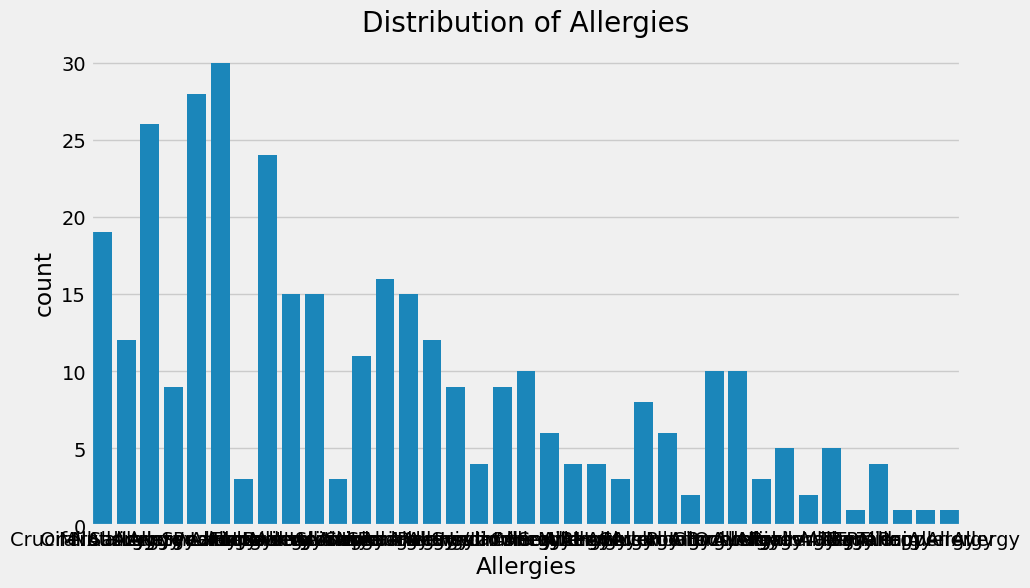

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Allergies', data=df)
plt.title('Distribution of Allergies')
plt.show()

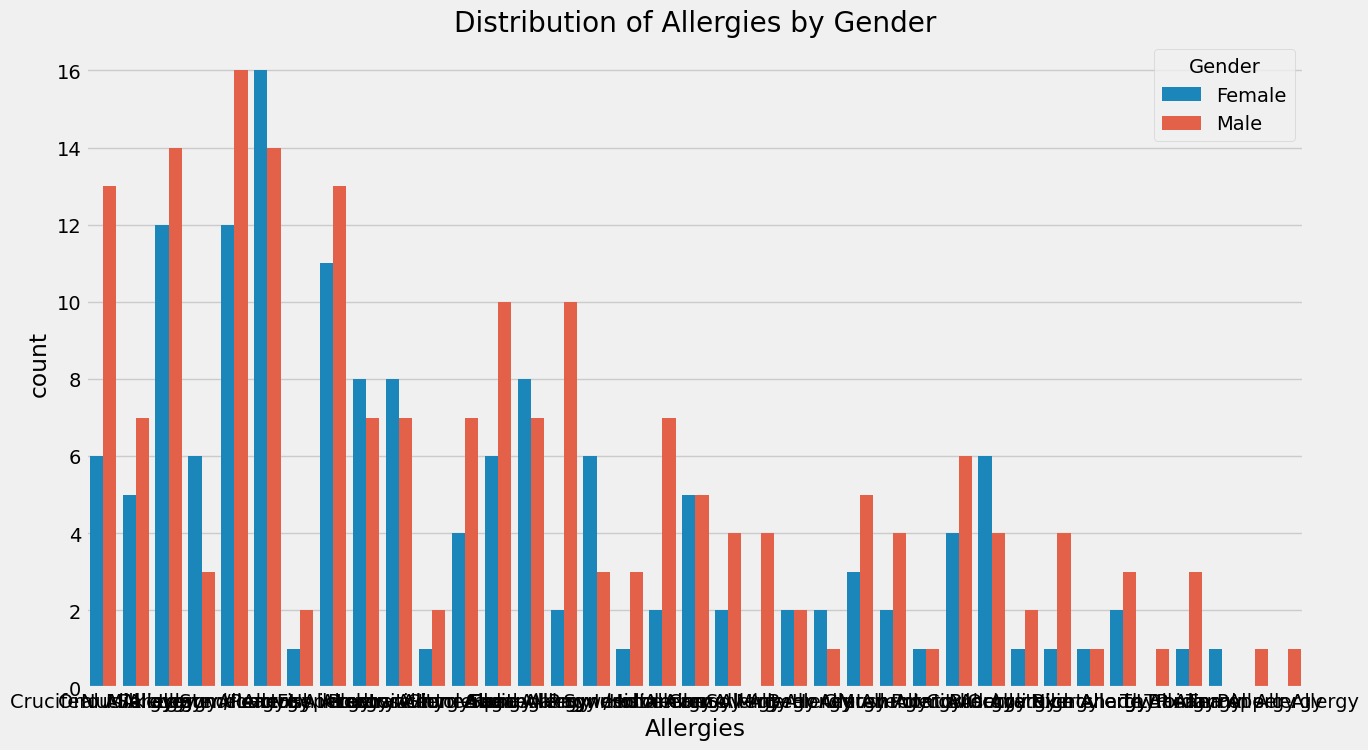

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Allergies', hue='Gender', data=df)
plt.title('Distribution of Allergies by Gender')
plt.show()


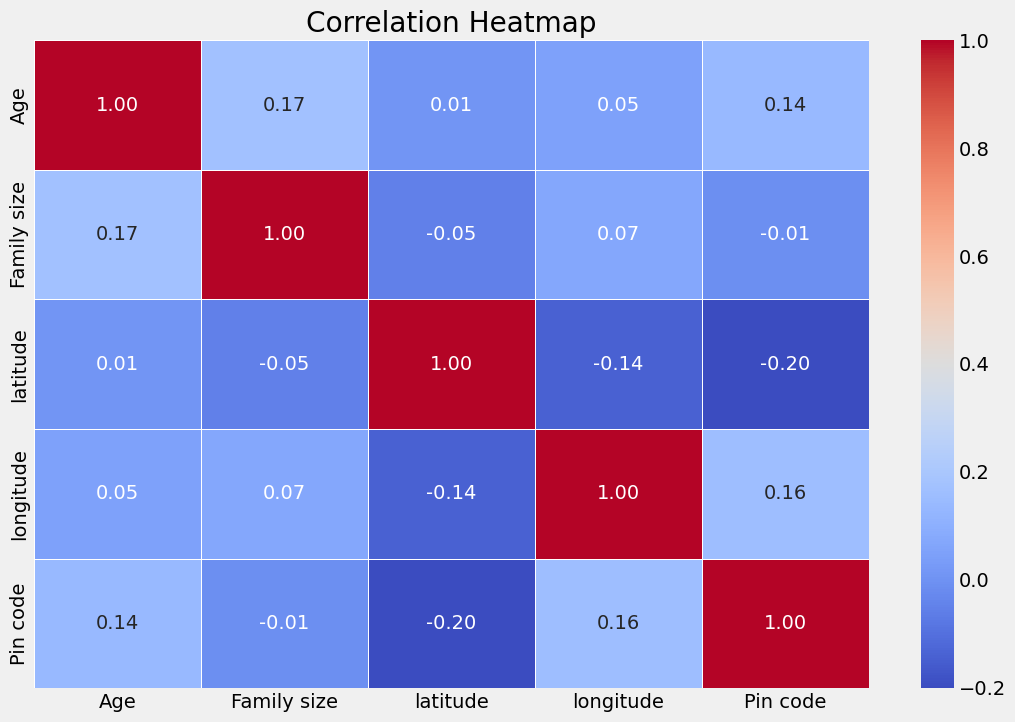

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


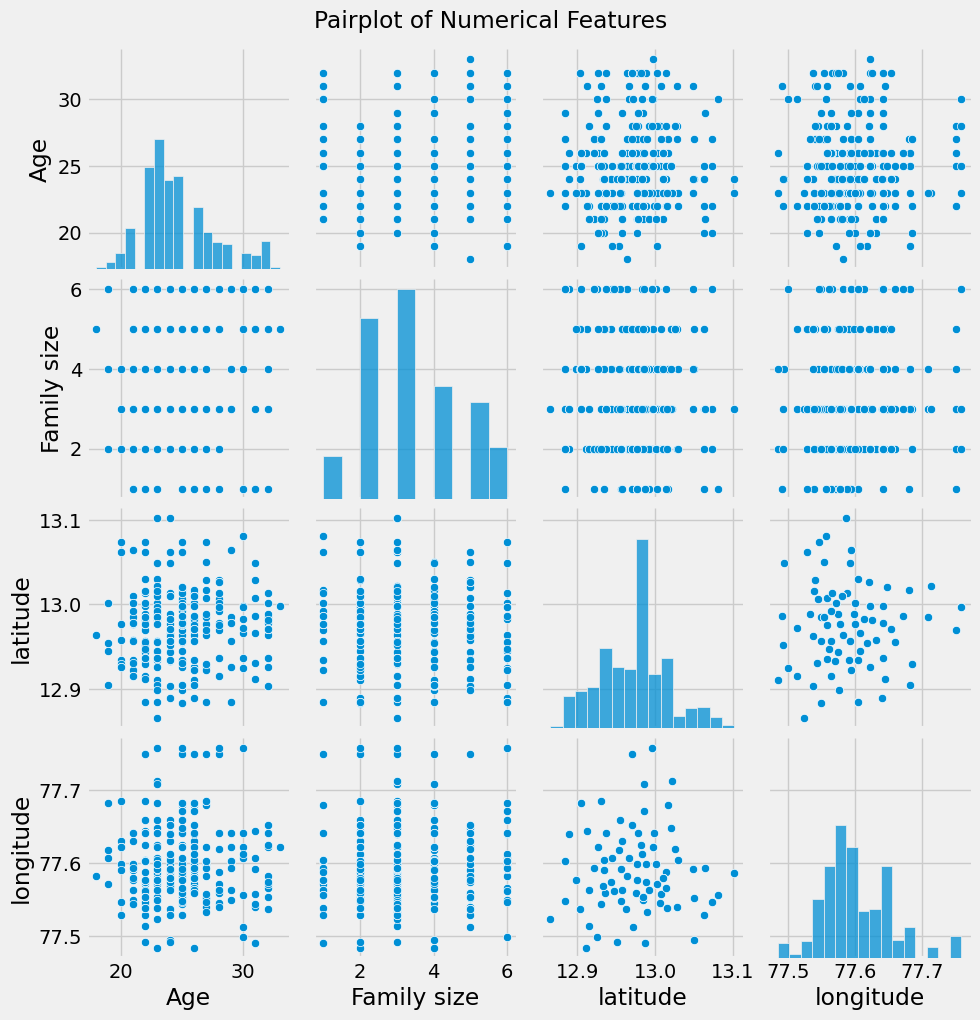

In [ ]:
sns.pairplot(df[['Age', 'Family size', 'latitude', 'longitude']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


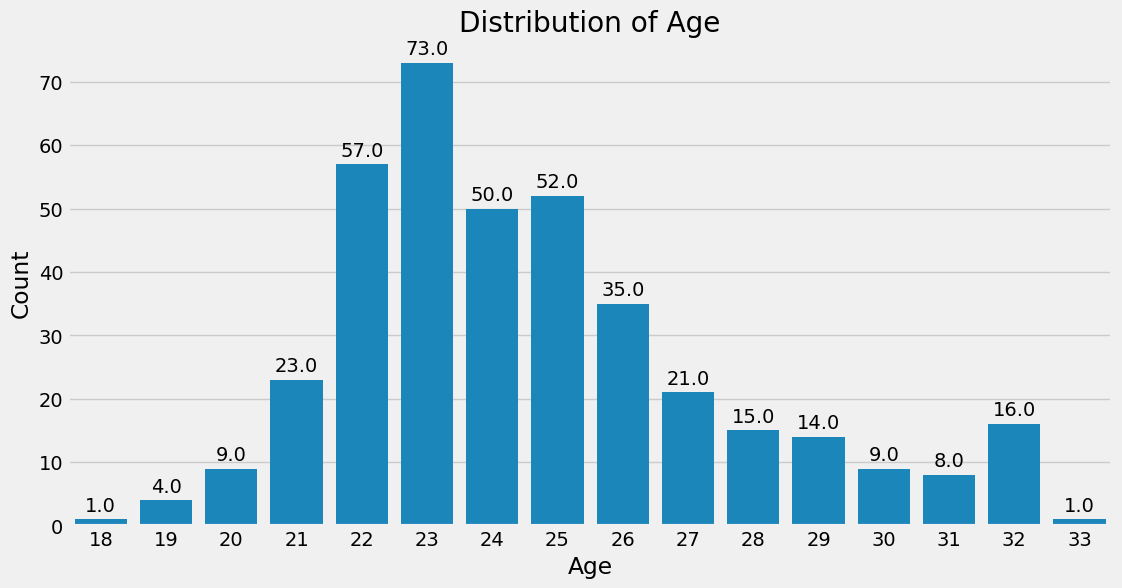

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Age' is a column in your DataFrame (replace df with your actual DataFrame name)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age', data=df)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
#Find a relationship between allergies and dataset

In [ ]:
#Find relationship with Food not allowed and dataset.

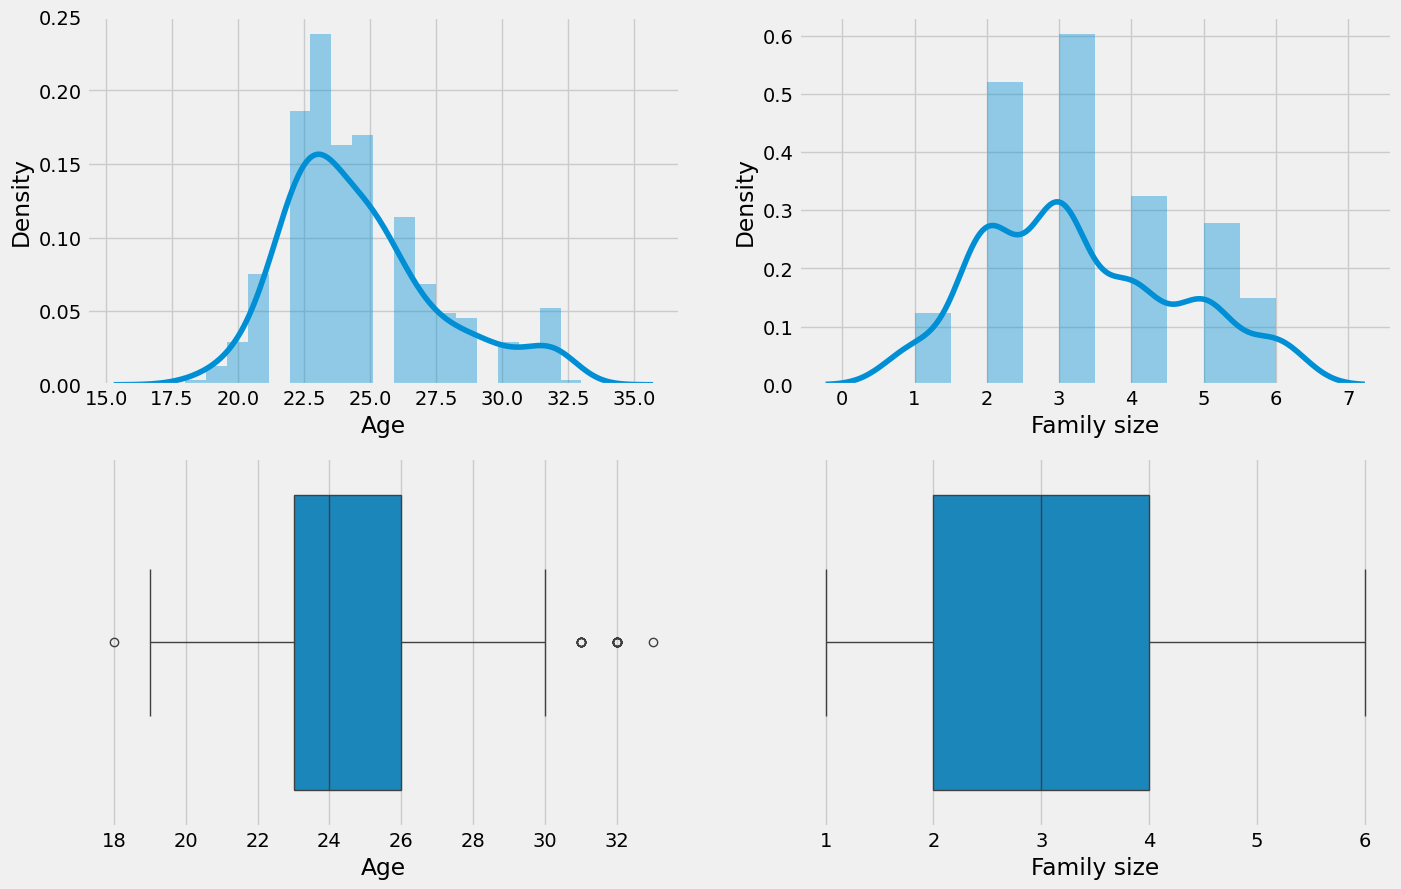

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['Age'])
plt.subplot(2,2,2)
sns.distplot(df['Family size'])
plt.subplot(2,2,3)
sns.boxplot(data=df,x='Age')
plt.subplot(2,2,4)
sns.boxplot(data=df,x='Family size')
plt.show() # Distribution of Age and Family size

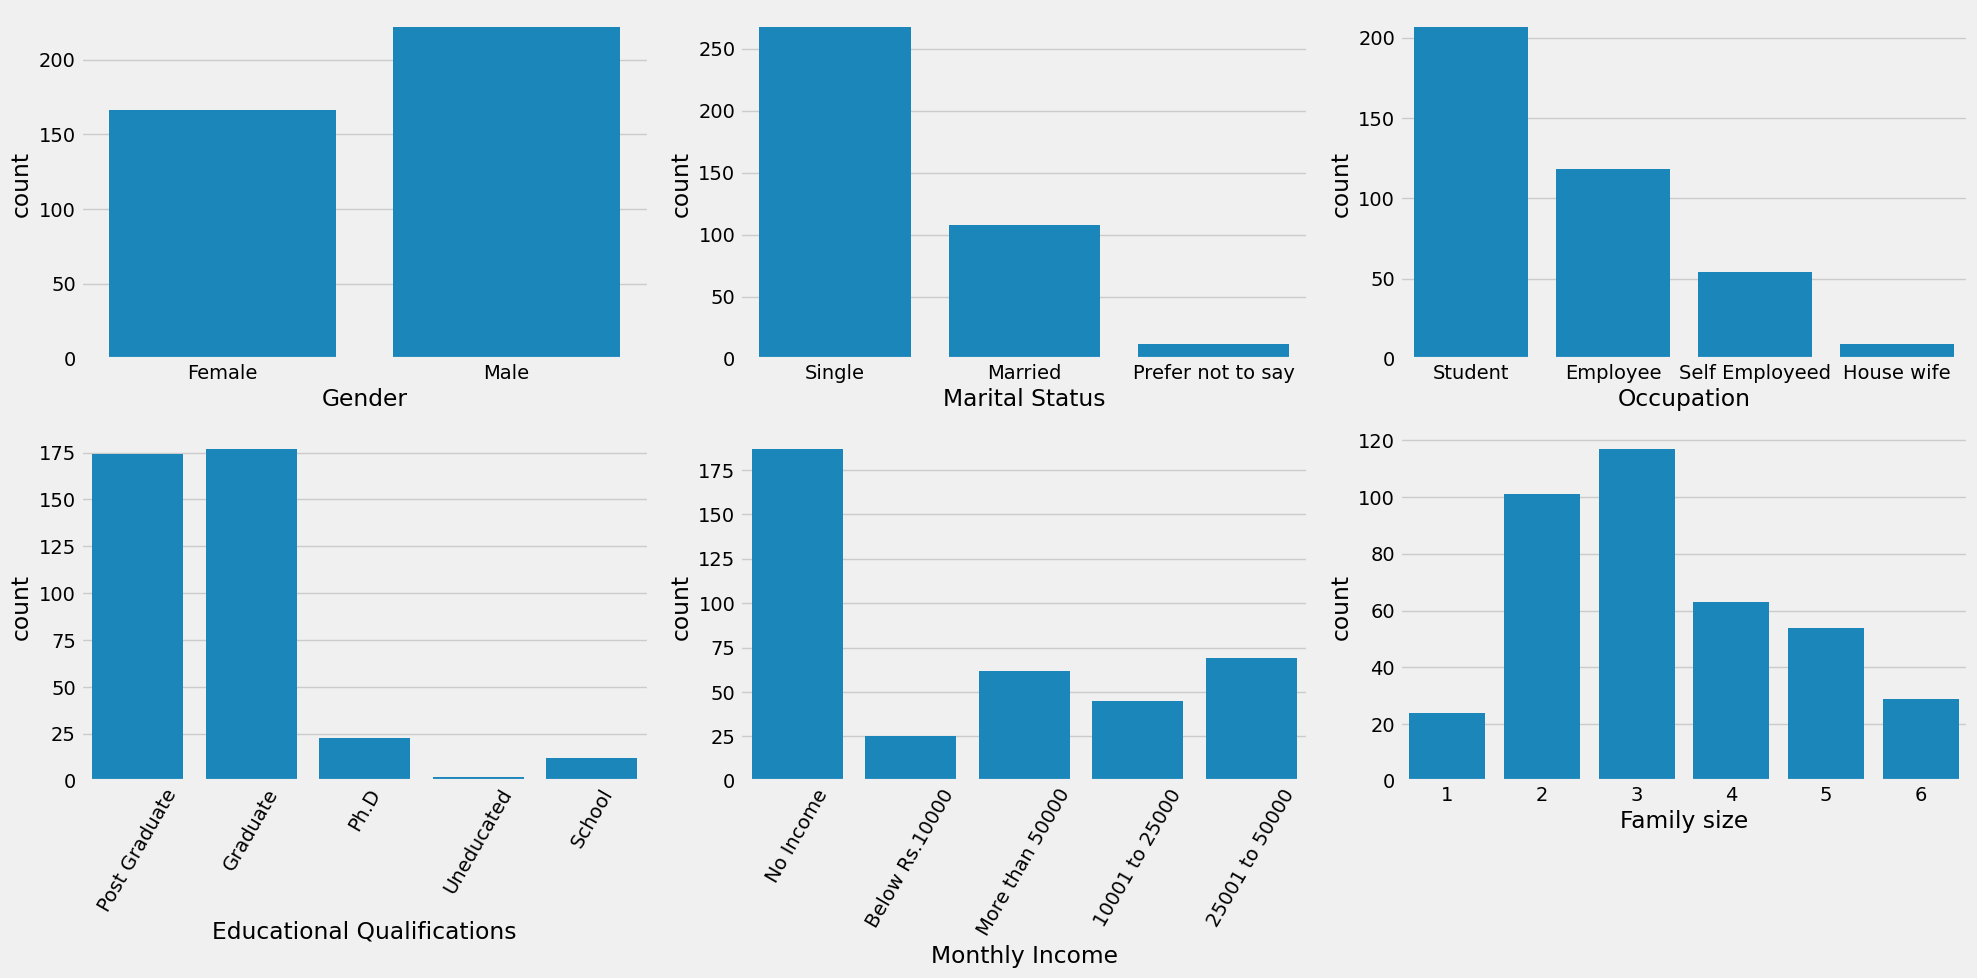

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(data=df,x='Gender')
plt.subplot(2,3,2)
sns.countplot(data=df,x='Marital Status')
plt.subplot(2,3,3)
sns.countplot(data=df,x='Occupation')
plt.subplot(2,3,4)
sns.countplot(data=df,x='Educational Qualifications')
plt.xticks(rotation=60)
plt.subplot(2,3,5)
sns.countplot(data=df,x='Monthly Income')
plt.xticks(rotation=60)
plt.subplot(2,3,6)
sns.countplot(data=df,x='Family size')
plt.tight_layout()
plt.show()

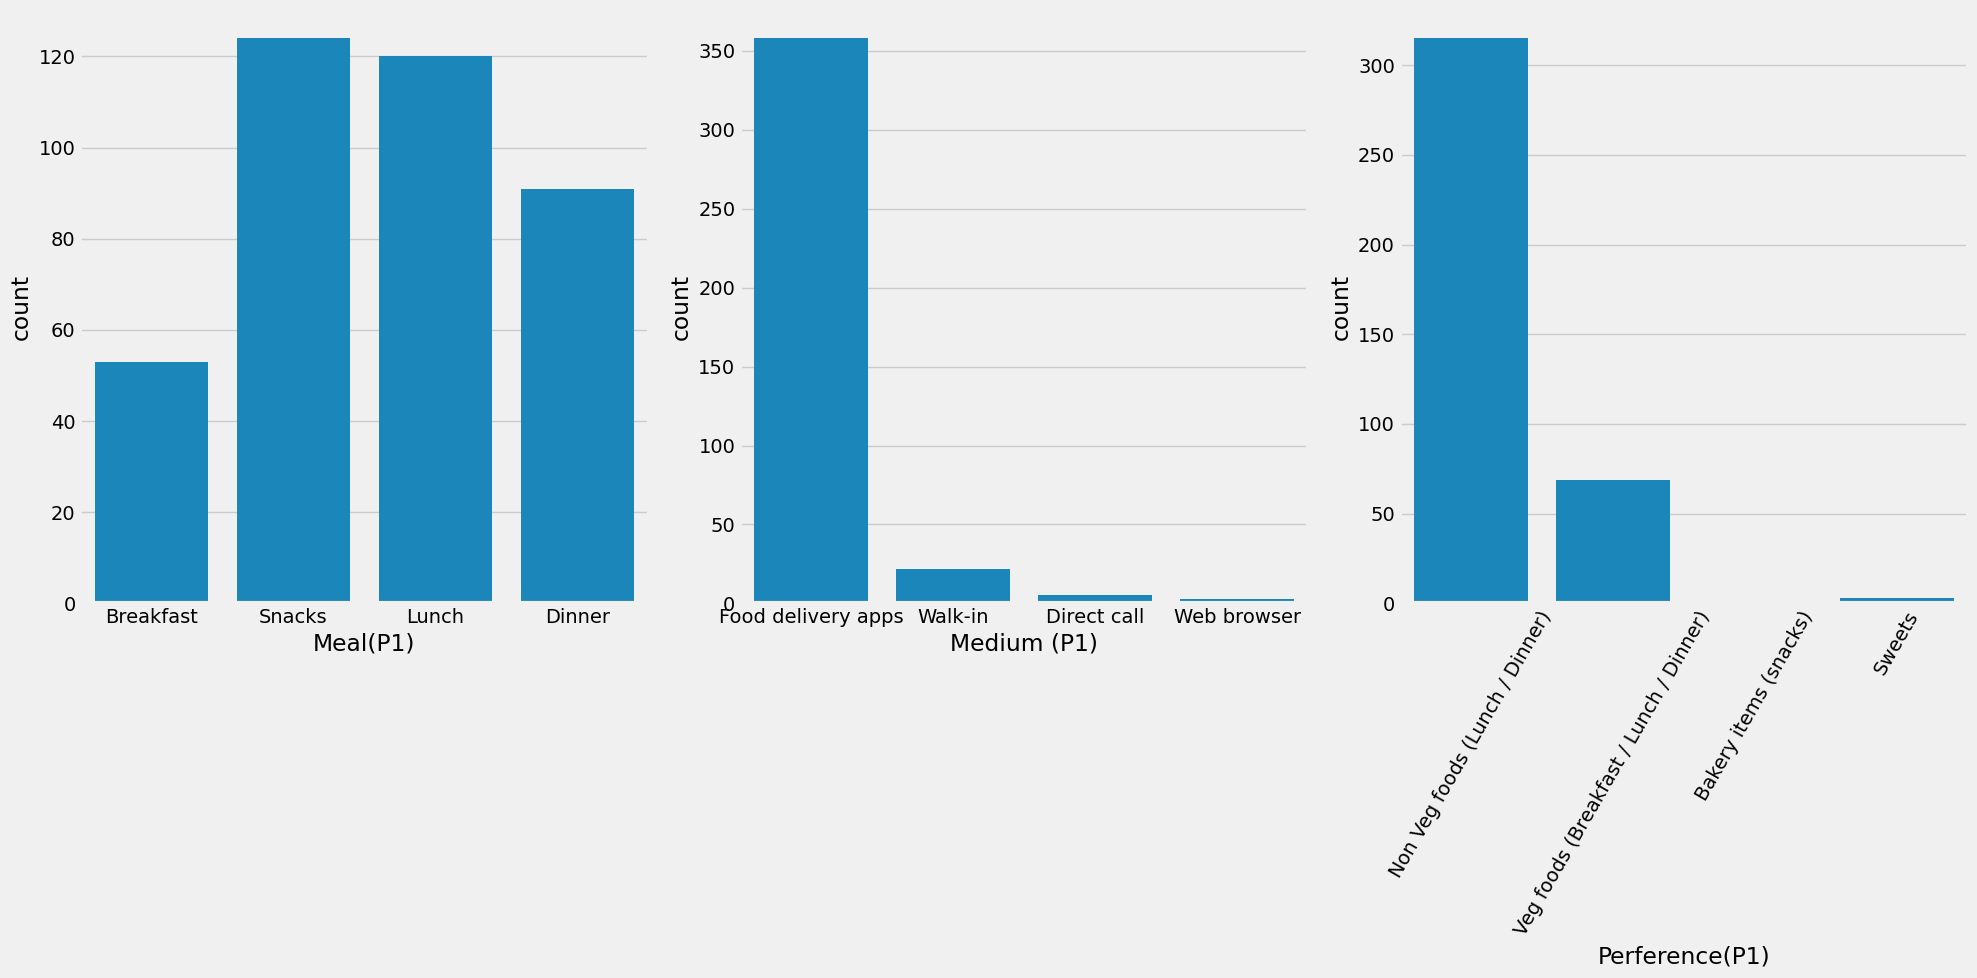

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.countplot(data=df,x='Meal(P1)')
plt.subplot(1,3,2)
sns.countplot(data=df,x='Medium (P1)')
plt.subplot(1,3,3)
sns.countplot(data=df,x='Perference(P1)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

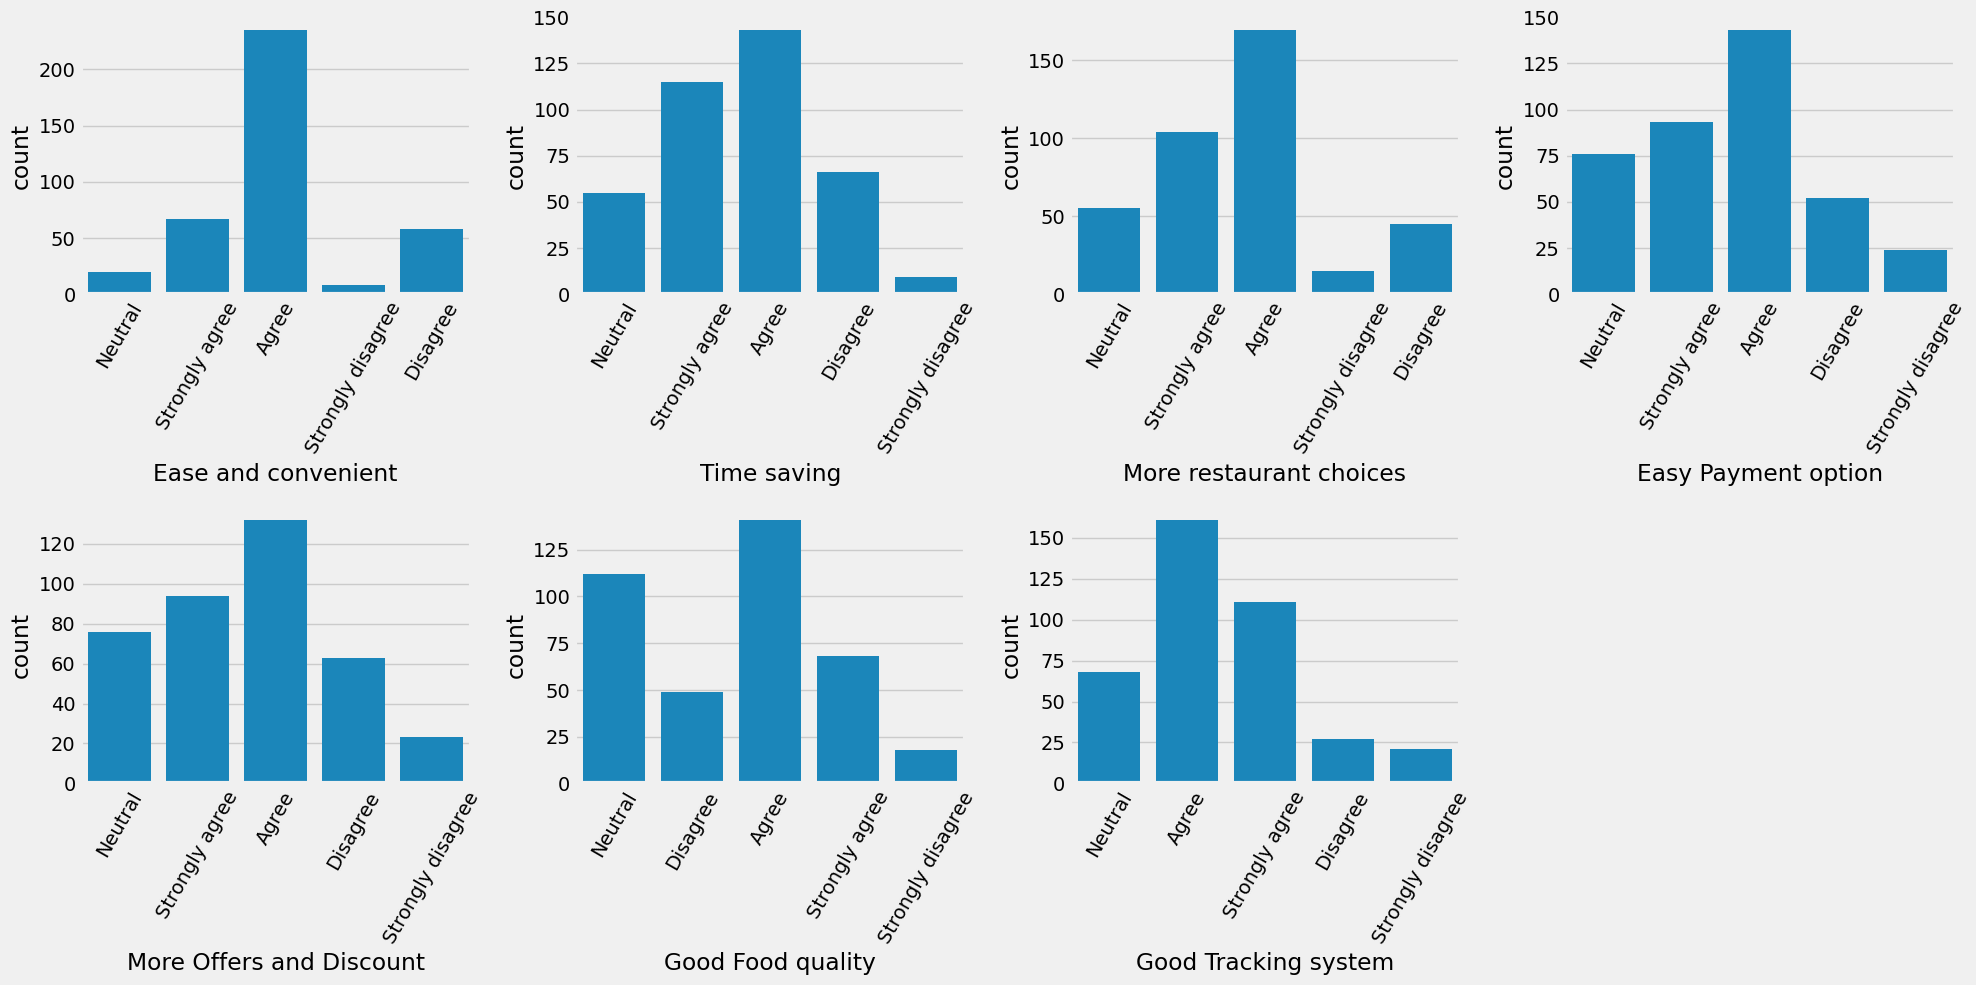

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.countplot(data=df,x='Ease and convenient')
plt.xticks(rotation=60)
plt.subplot(2,4,2)
sns.countplot(data=df,x='Time saving')
plt.xticks(rotation=60)
plt.subplot(2,4,3)
sns.countplot(data=df,x='More restaurant choices')
plt.xticks(rotation=60)
plt.subplot(2,4,4)
sns.countplot(data=df,x='Easy Payment option')
plt.xticks(rotation=60)
plt.subplot(2,4,5)
sns.countplot(data=df,x='More Offers and Discount')
plt.xticks(rotation=60)
plt.subplot(2,4,6)
sns.countplot(data=df,x='Good Food quality')
plt.xticks(rotation=60)
plt.subplot(2,4,7)
sns.countplot(data=df,x='Good Tracking system')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

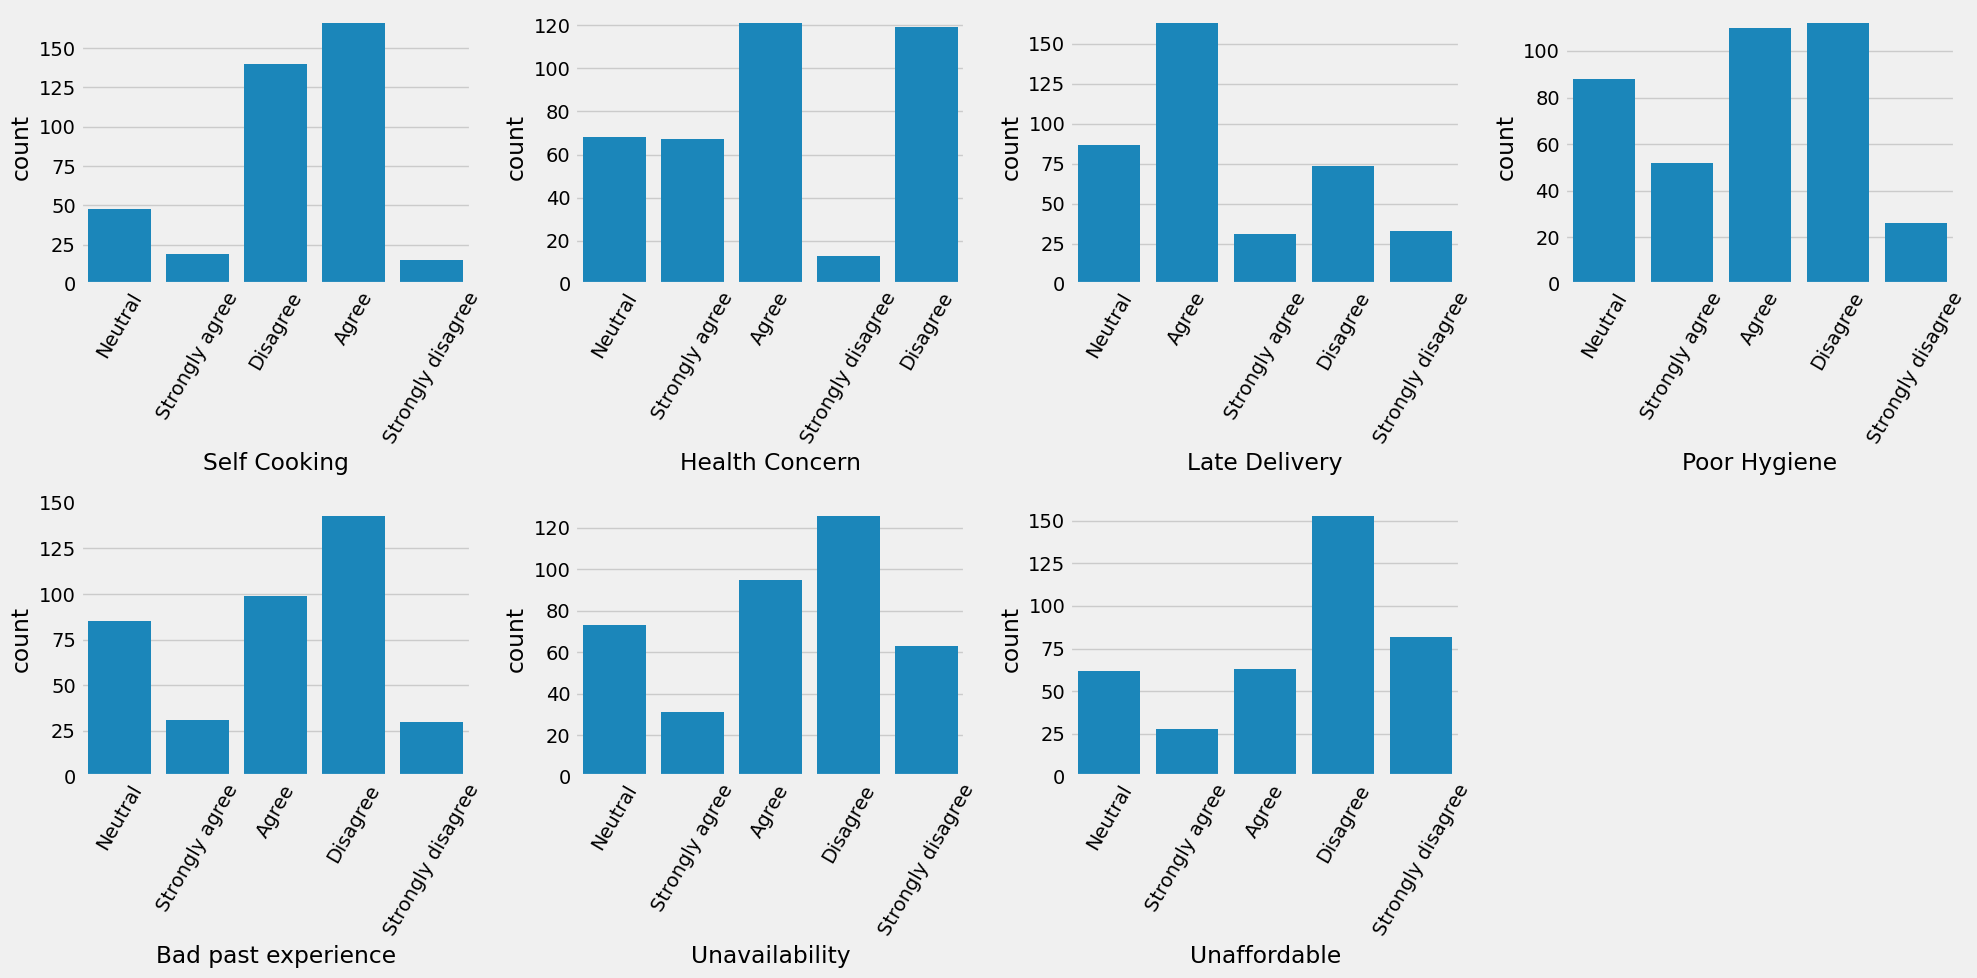

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.countplot(data=df,x='Self Cooking')
plt.xticks(rotation=60)
plt.subplot(2,4,2)
sns.countplot(data=df,x='Health Concern')
plt.xticks(rotation=60)
plt.subplot(2,4,3)
sns.countplot(data=df,x='Late Delivery')
plt.xticks(rotation=60)
plt.subplot(2,4,4)
sns.countplot(data=df,x='Poor Hygiene')
plt.xticks(rotation=60)
plt.subplot(2,4,5)
sns.countplot(data=df,x='Bad past experience')
plt.xticks(rotation=60)
plt.subplot(2,4,6)
sns.countplot(data=df,x='Unavailability')
plt.xticks(rotation=60)
plt.subplot(2,4,7)
sns.countplot(data=df,x='Unaffordable')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

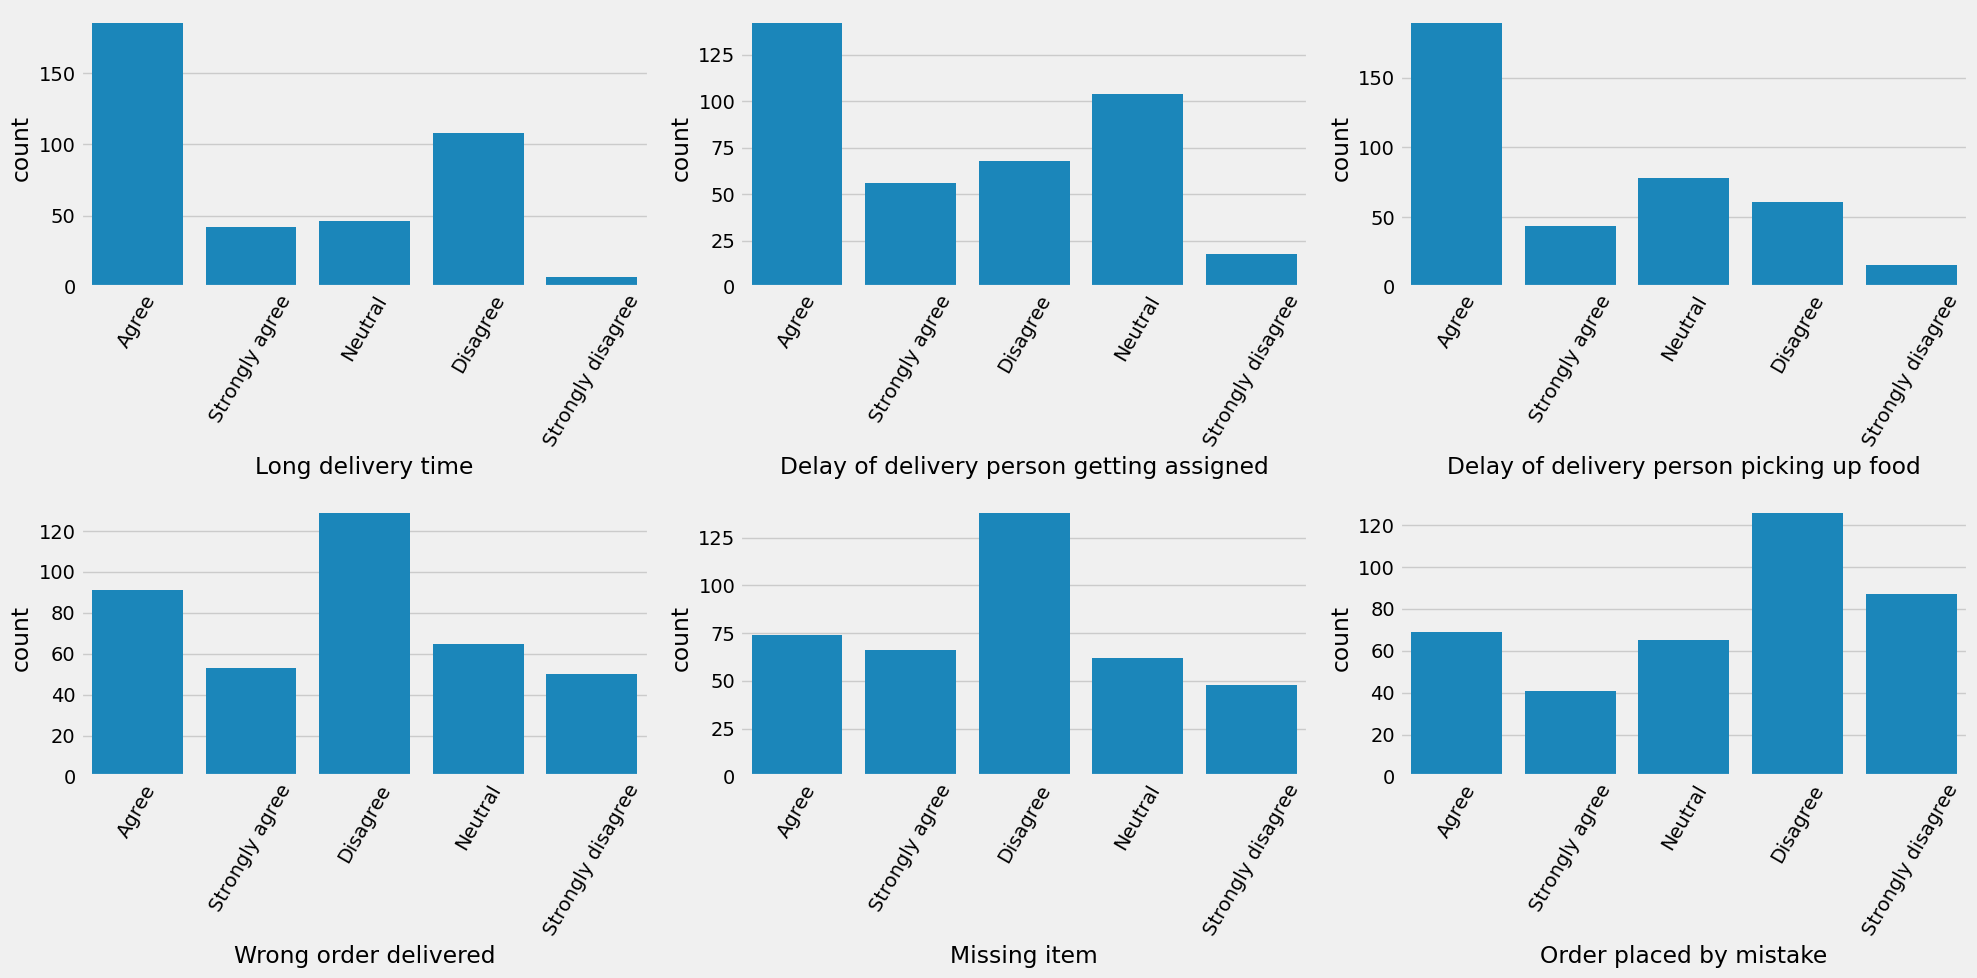

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(data=df,x='Long delivery time')
plt.xticks(rotation=60)
plt.subplot(2,3,2)
sns.countplot(data=df,x='Delay of delivery person getting assigned')
plt.xticks(rotation=60)
plt.subplot(2,3,3)
sns.countplot(data=df,x='Delay of delivery person picking up food')
plt.xticks(rotation=60)
plt.subplot(2,3,4)
sns.countplot(data=df,x='Wrong order delivered')
plt.xticks(rotation=60)
plt.subplot(2,3,5)
sns.countplot(data=df,x='Missing item')
plt.xticks(rotation=60)
plt.subplot(2,3,6)
sns.countplot(data=df,x='Order placed by mistake')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

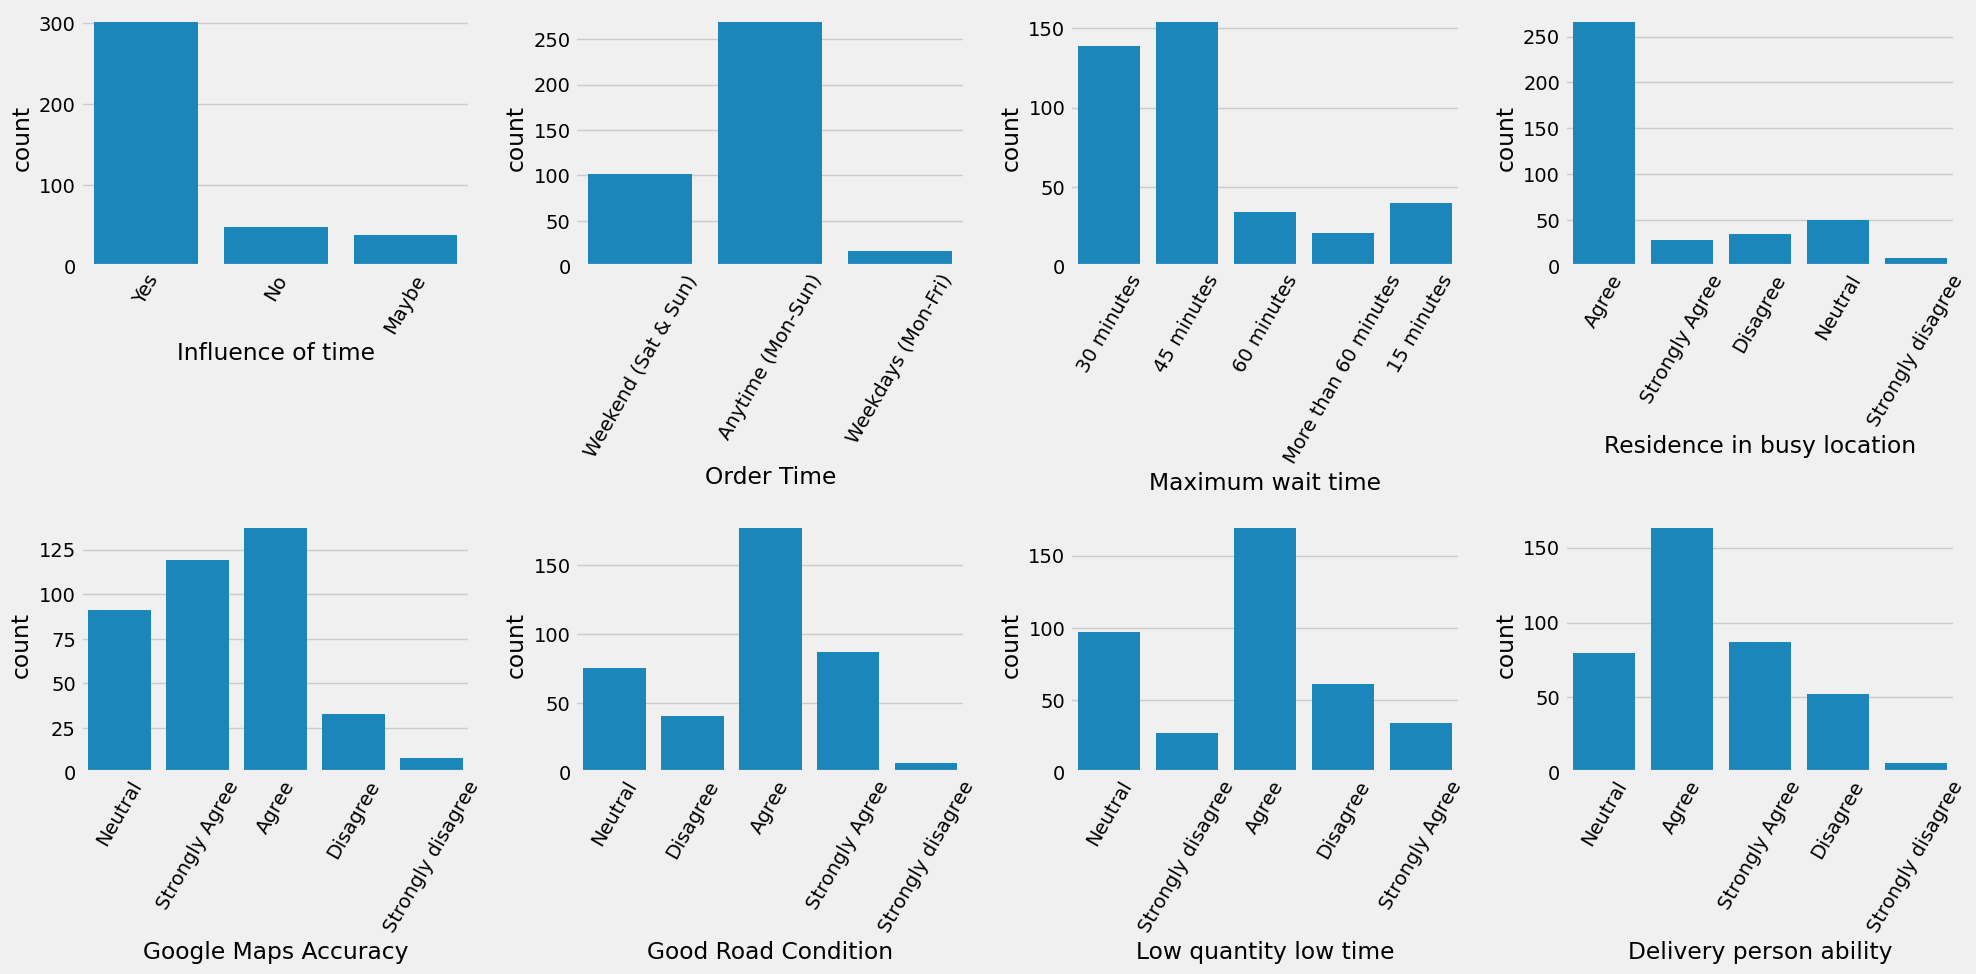

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.countplot(data=df,x='Influence of time')
plt.xticks(rotation=60)
plt.subplot(2,4,2)
sns.countplot(data=df,x='Order Time')
plt.xticks(rotation=60)
plt.subplot(2,4,3)
sns.countplot(data=df,x='Maximum wait time')
plt.xticks(rotation=60)
plt.subplot(2,4,4)
sns.countplot(data=df,x='Residence in busy location')
plt.xticks(rotation=60)
plt.subplot(2,4,5)
sns.countplot(data=df,x='Google Maps Accuracy')
plt.xticks(rotation=60)
plt.subplot(2,4,6)
sns.countplot(data=df,x='Good Road Condition')
plt.xticks(rotation=60)
plt.subplot(2,4,7)
sns.countplot(data=df,x='Low quantity low time')
plt.xticks(rotation=60)
plt.subplot(2,4,8)
sns.countplot(data=df,x='Delivery person ability')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

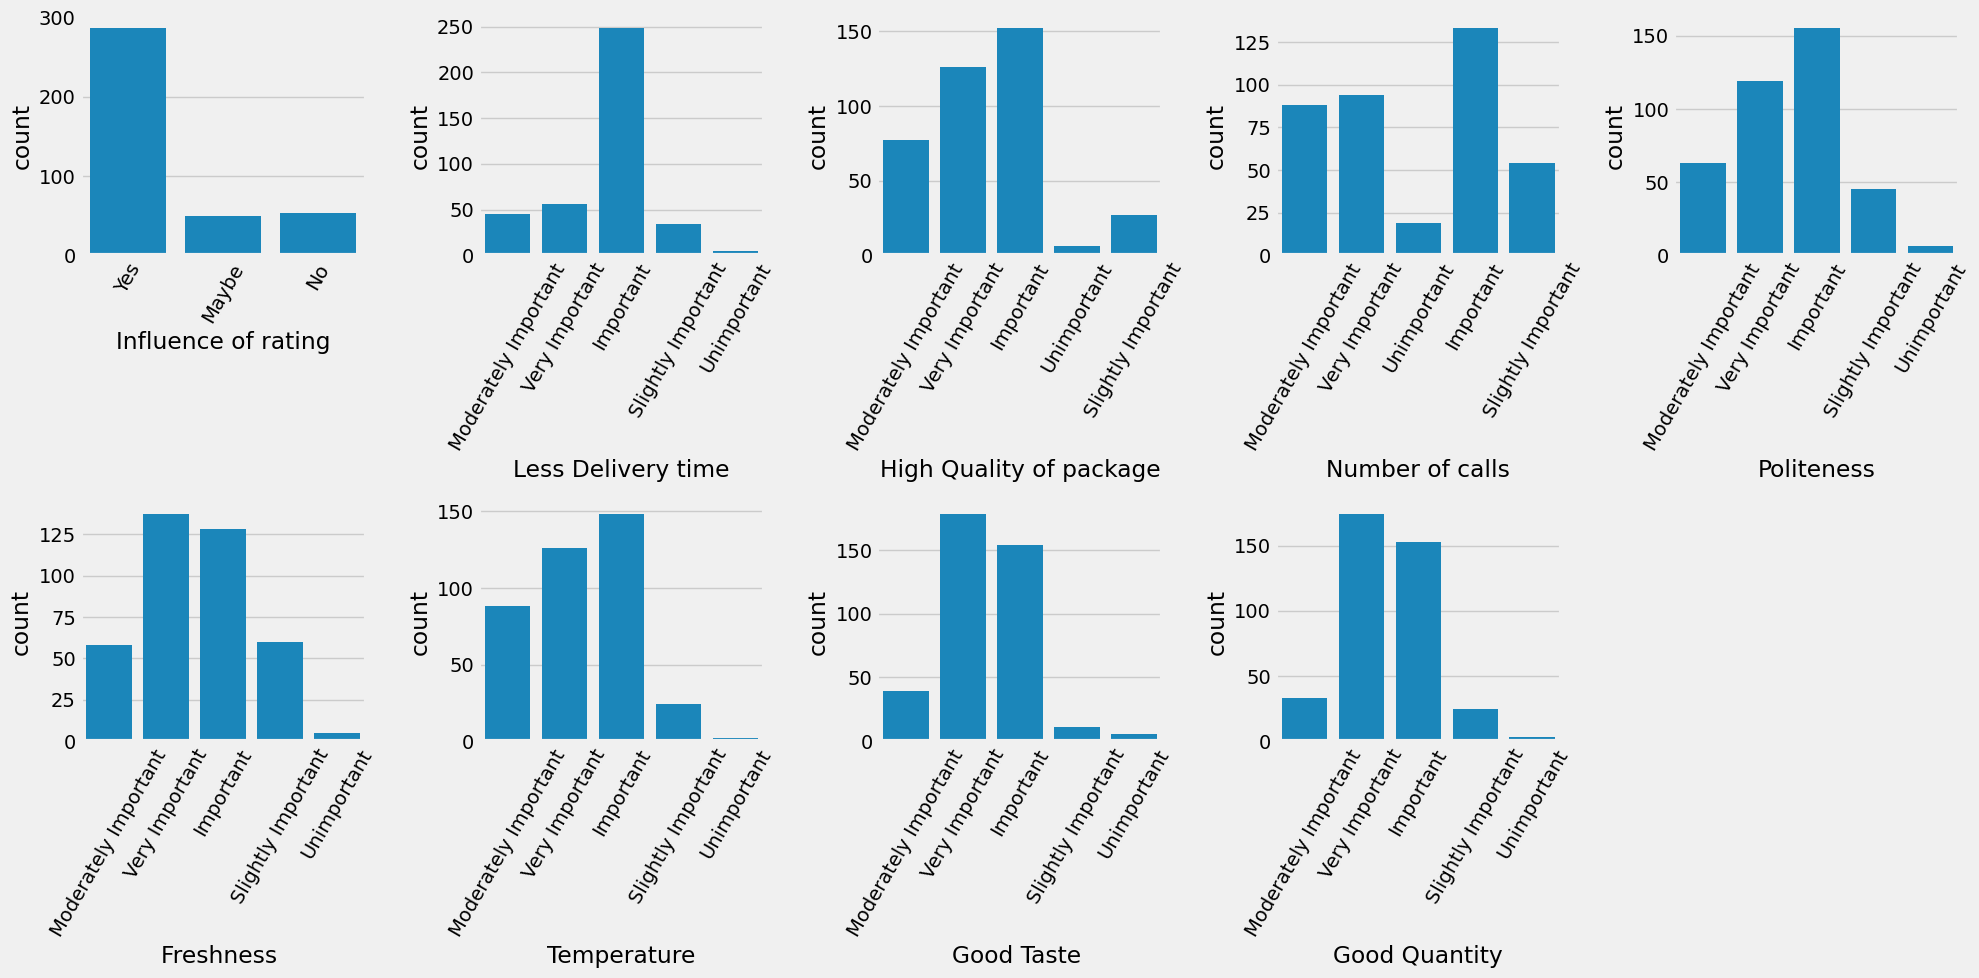

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.countplot(data=df,x='Influence of rating')
plt.xticks(rotation=60)
plt.subplot(2,5,2)
sns.countplot(data=df,x='Less Delivery time')
plt.xticks(rotation=60)
plt.subplot(2,5,3)
sns.countplot(data=df,x='High Quality of package')
plt.xticks(rotation=60)
plt.subplot(2,5,4)
sns.countplot(data=df,x='Number of calls')
plt.xticks(rotation=60)
plt.subplot(2,5,5)
sns.countplot(data=df,x='Politeness')
plt.xticks(rotation=60)
plt.subplot(2,5,6)
sns.countplot(data=df,x='Freshness ')
plt.xticks(rotation=60)
plt.subplot(2,5,7)
sns.countplot(data=df,x='Temperature')
plt.xticks(rotation=60)
plt.subplot(2,5,8)
sns.countplot(data=df,x='Good Taste ')
plt.xticks(rotation=60)
plt.subplot(2,5,9)
sns.countplot(data=df,x='Good Quantity')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

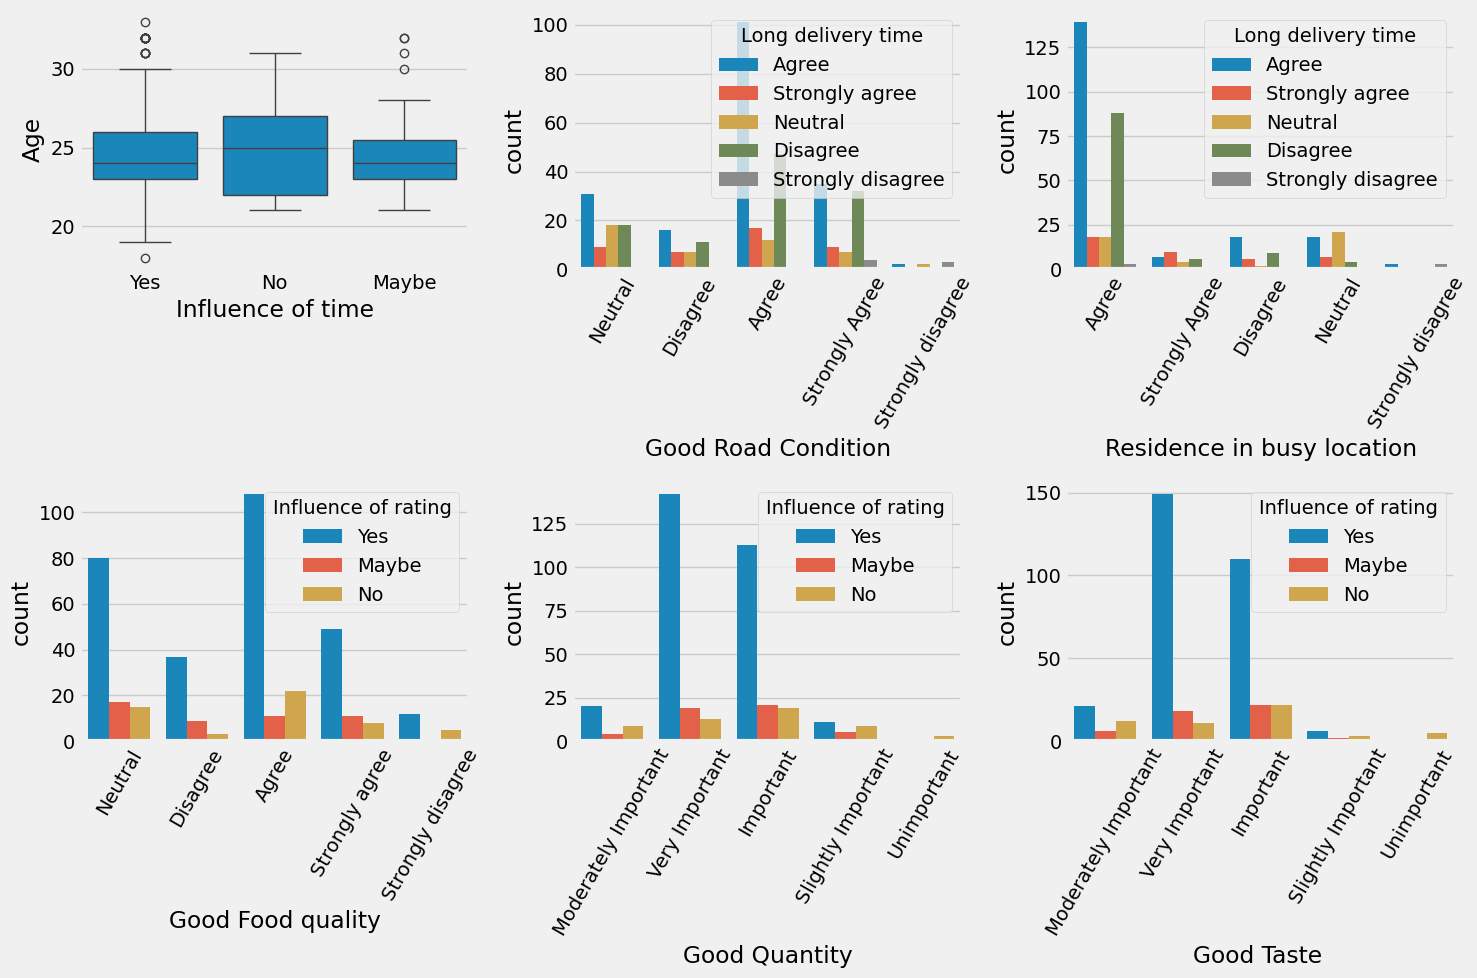

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=df,x='Influence of time',y='Age')
plt.subplot(2,3,2)
sns.countplot(data=df,x='Good Road Condition',hue='Long delivery time')
plt.xticks(rotation=60)
plt.subplot(2,3,3)
sns.countplot(data=df,x='Residence in busy location',hue='Long delivery time')
plt.xticks(rotation=60)
plt.subplot(2,3,4)
sns.countplot(data=df,x='Good Food quality',hue='Influence of rating')
plt.xticks(rotation=60)
plt.subplot(2,3,5)
sns.countplot(data=df,x='Good Quantity',hue='Influence of rating')
plt.xticks(rotation=60)
plt.subplot(2,3,6)
sns.countplot(data=df,x='Good Taste ',hue='Influence of rating')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

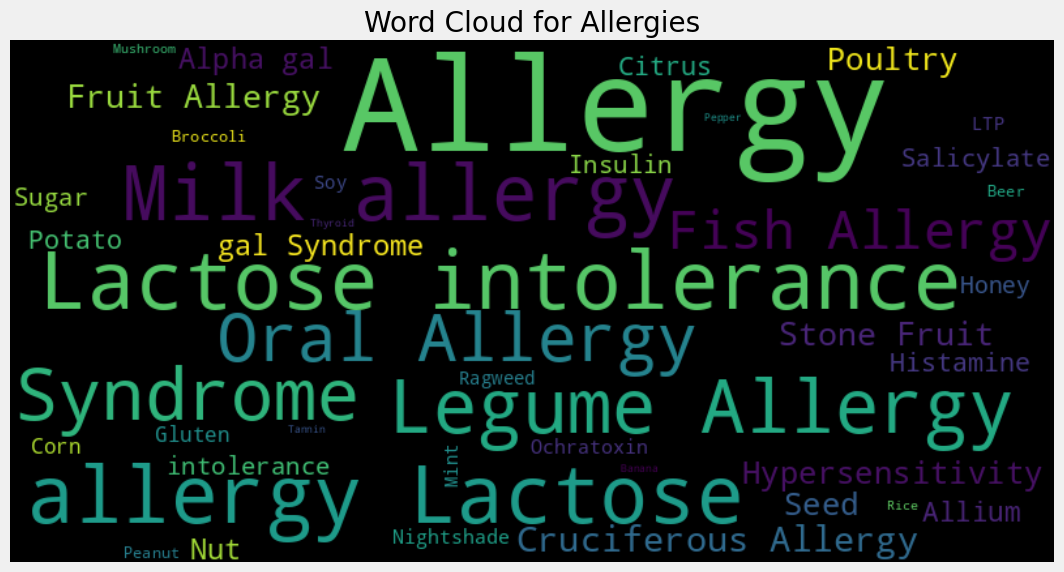

In [ ]:
allergies_text = ' '.join(df['Allergies'].dropna())
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100).generate(allergies_text)s

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Allergies')
plt.show()


### Text Aanlysis

In [ ]:
#Creating a copy
df1=df.copy()

#Removing unecessary reviews- Nil value
df1= df[~df['Reviews'].isin(['NIL','nil','Nil','No','Nil\n'])]

# Considering only two columns
df1=df1[['Reviews','Output']]

#Viewing the data
df1

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

#Applying the function on reviews column
df1['Reviews']=df1['Reviews'].apply(lambda x:review_cleaning(x))
df1.head()

In [ ]:
#Getting all the stop words
stop= stopwords.words('english')

#Removing the stop words
df1['Reviews'] = df1['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
df1.head()

In [ ]:
#Creating new variables
df1['polarity'] = df1['Reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df1['review_len'] = df1['Reviews'].astype(str).apply(len)
df1['word_count'] = df1['Reviews'].apply(lambda x: len(str(x).split()))

#Viewing the new variables
df1.head()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df1['polarity'])
plt.subplot(1,2,2)
sns.countplot(data=df1,x='Output')

## Data Preprocessing

### Handling Missing Values

In [24]:
# Drop rows with missing values
ppdata.dropna(inplace=True)

# Alternatively, fill missing values with a specific value
# df.fillna(value, inplace=True)

### Convert Categorical Variables

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ppdata['Gender'] = label_encoder.fit_transform(ppdata['Gender'])
ppdata['Marital Status'] = label_encoder.fit_transform(ppdata['Marital Status'])
ppdata['Occupation'] = label_encoder.fit_transform(ppdata['Occupation'])
ppdata['Monthly Income'] = label_encoder.fit_transform(ppdata['Monthly Income'])
ppdata['Educational Qualifications'] = label_encoder.fit_transform(ppdata['Educational Qualifications'])
ppdata['Medium (P1)'] = label_encoder.fit_transform(ppdata['Medium (P1)'])
ppdata['Medium (P2)'] = label_encoder.fit_transform(ppdata['Medium (P2)'])
ppdata['Meal(P1)'] = label_encoder.fit_transform(ppdata['Meal(P1)'])
ppdata['Meal(P2)'] = label_encoder.fit_transform(ppdata['Meal(P2)'])
ppdata['Ease and convenient'] = label_encoder.fit_transform(ppdata['Ease and convenient'])
ppdata['Time saving'] = label_encoder.fit_transform(ppdata['Time saving'])
ppdata['More restaurant choices'] = label_encoder.fit_transform(ppdata['More restaurant choices'])
ppdata['Easy Payment option'] = label_encoder.fit_transform(ppdata['Easy Payment option'])
ppdata['More Offers and Discount'] = label_encoder.fit_transform(ppdata['More Offers and Discount'])
ppdata['Good Food quality'] = label_encoder.fit_transform(ppdata['Good Food quality'])
ppdata['Good Tracking system'] = label_encoder.fit_transform(ppdata['Good Tracking system'])
ppdata['Self Cooking'] = label_encoder.fit_transform(ppdata['Self Cooking'])
ppdata['Health Concern'] = label_encoder.fit_transform(ppdata['Health Concern'])
ppdata['Late Delivery'] = label_encoder.fit_transform(ppdata['Late Delivery'])
ppdata['Poor Hygiene'] = label_encoder.fit_transform(ppdata['Poor Hygiene'])
ppdata['Bad past experience'] = label_encoder.fit_transform(ppdata['Bad past experience'])
ppdata['Unavailability'] = label_encoder.fit_transform(ppdata['Unavailability'])
ppdata['Unaffordable'] = label_encoder.fit_transform(ppdata['Unaffordable'])
ppdata['Long delivery time'] = label_encoder.fit_transform(ppdata['Gender'])
ppdata['Delay of delivery person getting assigned'] = label_encoder.fit_transform(ppdata['Delay of delivery person getting assigned'])
ppdata['Delay of delivery person picking up food'] = label_encoder.fit_transform(ppdata['Delay of delivery person picking up food'])
ppdata['Wrong order delivered'] = label_encoder.fit_transform(ppdata['Wrong order delivered'])
ppdata['Missing item'] = label_encoder.fit_transform(ppdata['Missing item'])
ppdata['Order placed by mistake'] = label_encoder.fit_transform(ppdata['Order placed by mistake'])
ppdata['Influence of time'] = label_encoder.fit_transform(ppdata['Influence of time'])
ppdata['Order Time'] = label_encoder.fit_transform(ppdata['Order Time'])
ppdata['Maximum wait time'] = label_encoder.fit_transform(ppdata['Maximum wait time'])
ppdata['Residence in busy location'] = label_encoder.fit_transform(ppdata['Residence in busy location'])
ppdata['Google Maps Accuracy'] = label_encoder.fit_transform(ppdata['Google Maps Accuracy'])
ppdata['Good Road Condition'] = label_encoder.fit_transform(ppdata['Good Road Condition'])
ppdata['Low quantity low time'] = label_encoder.fit_transform(ppdata['Low quantity low time'])
ppdata['Delivery person ability'] = label_encoder.fit_transform(ppdata['Delivery person ability'])
ppdata['Influence of rating'] = label_encoder.fit_transform(ppdata['Influence of rating'])
ppdata['Less Delivery time'] = label_encoder.fit_transform(ppdata['Less Delivery time'])
ppdata['High Quality of package'] = label_encoder.fit_transform(ppdata['High Quality of package'])
ppdata['Politeness'] = label_encoder.fit_transform(ppdata['Politeness'])
ppdata['Temperature'] = label_encoder.fit_transform(ppdata['Temperature'])
ppdata['Good Quantity'] = label_encoder.fit_transform(ppdata['Good Quantity'])
ppdata['Output'] = label_encoder.fit_transform(ppdata['Output'])
ppdata['Reviews'] = label_encoder.fit_transform(ppdata['Reviews'])
ppdata['Allergies'] = label_encoder.fit_transform(ppdata['Allergies'])
ppdata['Food not allowed'] = label_encoder.fit_transform(ppdata['Food not allowed'])
ppdata['Perference(P1)'] = label_encoder.fit_transform(ppdata['Perference(P1)'])
ppdata['Perference(P2)'] = label_encoder.fit_transform(ppdata['Perference(P2)'])
ppdata['Number of calls'] = label_encoder.fit_transform(ppdata['Number of calls'])
ppdata['Good Taste '] = label_encoder.fit_transform(ppdata['Good Taste '])
ppdata['Freshness '] = label_encoder.fit_transform(ppdata['Freshness '])


In [49]:
print(ppdata.columns)


Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

### TeXt data Preprocessing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
reviews_tfidf = tfidf_vectorizer.fit_transform(ppdata['Reviews'].fillna(''))


### Scaling Numerical Features

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ppdata[['Age', 'Family size']] = scaler.fit_transform(ppdata[['Age', 'Family size']])
# Repeat this process for other numerical features


In [51]:
from sklearn.preprocessing import StandardScaler

# Select the remaining numerical features
numerical_features = ['latitude', 'longitude', 'Pin code']

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the selected numerical features
ppdata[numerical_features] = scaler.fit_transform(ppdata[numerical_features])

# Display the updated DataFrame
print(ppdata.head())


        Age  Gender  Marital Status  Occupation  Monthly Income  \
0 -1.529260       0               2           3               4   
1 -0.178185       0               2           3               2   
2 -0.853723       1               2           3               2   
3 -0.853723       0               2           3               4   
4 -0.853723       1               2           3               2   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2     0.524841  0.096687   0.006221 -1.240375   
1                           0    -0.223383  0.105699  -0.423011 -0.982877   
2                           2    -0.223383 -0.387694   1.176853 -0.725379   
3                           0     2.021288 -0.563423  -0.729326 -0.661004   
4                           2     0.524841  0.285933  -0.891264 -0.950690   

   Medium (P1)  Medium (P2)  Meal(P1)  Meal(P2)  Perference(P1)  \
0            1            2         0         1               1   


### Feature Engineering

In [83]:
# Example: Combine features to create a new one
#ppdata['Total_Cuisine_Preferences'] = ppdata['Perference(P1)'] + ppdata['Perference(P2)']
ppdata['Meal_Preference_P1'] = ppdata['Meal(P1)'] + ppdata['Perference(P1)']
ppdata['Meal_Preference_P2'] = ppdata['Meal(P2)'] + ppdata['Perference(P2)']
ppdata['Overall_Satisfaction'] = ppdata['Good Food quality'] + ppdata['Good Quantity'] + ppdata['Freshness ']
ppdata['Order_MaxWait_Time'] = ppdata['Order Time'] + ppdata['Maximum wait time']
ppdata['Order_LessDelivery_Time'] = ppdata['Order Time'] + ppdata['Less Delivery time']
ppdata['Customer_Satisfaction_Score'] = ppdata['Reviews'] + ppdata['Number of calls']
ppdata['Overall_Preference_P1'] = ppdata['Medium (P1)'] + ppdata['Meal(P1)']
ppdata['Overall_Preference_P2'] = ppdata['Medium (P2)'] + ppdata['Meal(P2)']


In [84]:
print(ppdata.columns)

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Medium (P1)',
       'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)',
       'Perference(P2)', 'Ease and convenient', 'Time saving',
       'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of rating', 'Less Delivery time',
      

### Drop Unecessary Columns

In [59]:
ppdata.drop(['Pin code', 'latitude', 'longitude'], axis=1, inplace=True)


### Define Target Variable

In [85]:
X = ppdata.drop('Output', axis=1)  # Features
y = ppdata['Output']  # Target variable


### Split the data

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Text Data Preprocessing (tokenization if needed or possible)

In [67]:
print(ppdata['Allergies'].unique())

[ 7 21 23 30 16 17 24  8 12 27 15  0 33 31  1 34 28 13 10  6 32 18  3 11
  9 19 26  5  4 29 20 36 14 22  2 35 25]


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
allergies_tfidf = tfidf_vectorizer.fit_transform(ppdata['Allergies'].fillna('').astype(str))




## Build a Similarity Matrix

In [78]:
#Calculate cosine similarity
similarity_matrix = cosine_similarity(Health Concern, allergies_tfidf)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-78-b3208db46480>, line 2)

## Generate Recommendations

In [79]:
user_id = 0  # Replace with the actual user ID
user_health_preferences = health_features.iloc[user_id].values.reshape(1, -1)
user_recommendations = similarity_matrix.dot(user_health_preferences.T)

NameError: name 'health_features' is not defined

## Filtering Based on Allergies

In [ ]:
user_allergies = df.loc[user_id, 'Allergies']
if user_allergies:
    user_recommendations[user_recommendations <= 0] = 0  # Filter out items with allergens

## Model Evaluation

## Model Deployment